In [1]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as stats
import xlsxwriter
from sklearn.impute import SimpleImputer
import time
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_csv("Data.csv")

### Let's see the 1st 5 row

In [3]:
data_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Let's see the last 5 row

In [4]:
data_df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


### Check the missing values 

In [5]:
def check_NaN(data_df):
    """
    input: pandas data frame
    output :print number of missing values with percentage
    """
    total_na = data_df.isnull().sum(axis=0).sort_values(ascending=False)
    # calculate percentage
    percent = ((data_df.isnull().sum(axis=0)/data_df.isnull().count(axis=0))*100).sort_values(ascending=False)
    na_percent = pd.concat([total_na,percent],axis=1,keys=['Total','Percentage'])
    print("="*20 +" Misssing Values are "+ "="*20,"\n" ,na_percent)

In [6]:
check_NaN(data_df)

==================== Misssing Values are ==================== 
                                   Total  Percentage
MINIMUM_PAYMENTS                    313    3.497207
CREDIT_LIMIT                          1    0.011173
TENURE                                0    0.000000
PURCHASES_FREQUENCY                   0    0.000000
BALANCE                               0    0.000000
BALANCE_FREQUENCY                     0    0.000000
PURCHASES                             0    0.000000
ONEOFF_PURCHASES                      0    0.000000
INSTALLMENTS_PURCHASES                0    0.000000
CASH_ADVANCE                          0    0.000000
ONEOFF_PURCHASES_FREQUENCY            0    0.000000
PRC_FULL_PAYMENT                      0    0.000000
PURCHASES_INSTALLMENTS_FREQUENCY      0    0.000000
CASH_ADVANCE_FREQUENCY                0    0.000000
CASH_ADVANCE_TRX                      0    0.000000
PURCHASES_TRX                         0    0.000000
PAYMENTS                              0    0.000000


### Fill the NaN Values using imputer


In [7]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(data_df[['MINIMUM_PAYMENTS']])
data_df['MINIMUM_PAYMENTS'] = imp_median.transform(data_df[['MINIMUM_PAYMENTS']])

In [8]:
data_df.CREDIT_LIMIT.max(), data_df.CREDIT_LIMIT.min()

(30000.0, 50.0)

In [9]:
data_df=data_df[data_df.CREDIT_LIMIT.isin([np.nan])==False]

### Make the deepcopy of the dataframe

In [10]:
df = copy.deepcopy(data_df)

In [11]:
df.shape

(8949, 18)

In [12]:
print ("\n Data Types of feature :  \n",df.dtypes)


 Data Types of feature :  
 CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


In [13]:
df['CASH_ADVANCE_TRX']=df.CASH_ADVANCE_TRX.astype('float')
df['PURCHASES_TRX']=df.PURCHASES_TRX.astype('float')
df['TENURE']=df.TENURE.astype('float')

### Intital Descriptive Analysis 

In [14]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Advanced data preparation


### Setp 1. Monthly average purchase and cash advance amount

In [15]:
df['Monthly_Avg_Purchase']=df['PURCHASES']/df['TENURE']

In [16]:
df['Monthly_Cash_Advance']=df['CASH_ADVANCE']/df['TENURE']

In [17]:
my_df=pd.concat([df.Monthly_Avg_Purchase,df.TENURE,df.PURCHASES],axis=1,keys=['Monthly_Avg_Purchase','TENURE','PURCHASES'])

In [18]:
my_df.head()

,Monthly_Avg_Purchase,TENURE,PURCHASES
0,7.950000,12.0,95.40
1,0.000000,12.0,0.00
2,64.430833,12.0,773.17
3,124.916667,12.0,1499.00
4,1.333333,12.0,16.00


In [19]:
my_df.tail()

,Monthly_Avg_Purchase,TENURE,PURCHASES
8945,48.520000,6.0,291.12
8946,50.000000,6.0,300.00
8947,24.066667,6.0,144.40
8948,0.000000,6.0,0.00
8949,182.208333,6.0,1093.25


### Count the None ONEOFF PURCHASES

In [20]:
print("Total No of none ONEOFF_PURCHASES: ",df[df['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count())

Total No of none ONEOFF_PURCHASES:  4301


### Lets see both types of PURCHASE

In [21]:
df_pur = df.loc[:,['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

In [22]:
df_pur.head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


In [23]:
df_pur.tail()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00
8949,1093.25,0.00


## Let's see the purchase behaviour of customer

In [24]:
def purchase_behaviour(df):
    df = copy.deepcopy(df)
    a=df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']==0)]
    a['Purchase_Type'] = 'None'
    b=df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']>0)]
    b['Purchase_Type'] = 'Both_OneOff_Installment'
    c=df[(df['ONEOFF_PURCHASES']>0) & (df['INSTALLMENTS_PURCHASES']==0)]
    c['Purchase_Type'] = 'OneOff'
    d= df[(df['ONEOFF_PURCHASES']==0) & (df['INSTALLMENTS_PURCHASES']>0)]
    d['Purchase_Type'] = 'Istallment'
    print("=-="*40)
    print("Total None for both: ",a.shape[0])
    print("Total No for both:",b.shape[0])
    print("Total No for OneOff: ",c.shape[0])
    print("Total No for Instalment :",d.shape[0])
    
    # concat the datarame
    if len(df) !=0:
        final_df = pd.concat([a,b,c,d],axis=0)
    return final_df
    

In [25]:
df_p=purchase_behaviour(df)

=-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-==-=
Total None for both:  2041
Total No for both: 2774
Total No for OneOff:  1874
Total No for Instalment : 2260


In [26]:
df_p = df_p.sort_values(by='CUST_ID')

In [27]:
df_p.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,Istallment
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,None
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,OneOff
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,124.916667,17.149001,OneOff
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,OneOff


## Limit usage (balance to credit limit ratio)
[Credit_Score](https://www.equifax.com/personal/education/credit/score/what-is-a-good-credit-score/#:~:text=Although%20ranges%20vary%20depending%20on,and%20up%20are%20considered%20excellent.) and
[Credit_Limit use](https://www.thebalance.com/how-to-calculate-your-credit-utilization-ratio-960473#:~:text=Let%27s%20say%20your%20credit%20card%20balance%20is%20%24600,all%20your%20accounts%2C%20first%20add%20all%20the%20balances.)

In [28]:
df['Limit_Usage']=df.apply(lambda x: (x['BALANCE']/x['CREDIT_LIMIT']), axis=1)

In [29]:
# Lower values indicate customer doesn't used credit more

# Payments to minimum payments ratio

In [30]:
df['Payment_Minpay']=df.apply(lambda x:(x['PAYMENTS']/x['MINIMUM_PAYMENTS']),axis=1)

In [31]:
df['Purchase_Type']=df_p.loc[:,'Purchase_Type']

In [32]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage,Payment_Minpay,Purchase_Type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,0.040901,1.446508,Istallment
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,0.457495,3.826241,None
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,0.332687,0.991682,OneOff
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12.0,124.916667,17.149001,0.222223,0.000000,OneOff
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,0.681429,2.771075,OneOff


# Insight from KPI
###  Average payment_minpayment ratio for each purchse type.

In [33]:
avg_pay=df.groupby('Purchase_Type').apply(lambda x: np.mean(x['Payment_Minpay']))

In [34]:
avg_pay

Purchase_Type
Both_OneOff_Installment     7.236982
Istallment                 13.259004
None                       10.092086
OneOff                      5.571082
dtype: float64

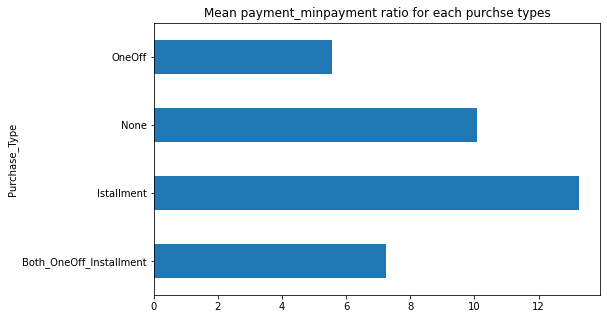

In [35]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Mean payment_minpayment ratio for each purchse types')
df.groupby('Purchase_Type').apply(lambda x: np.mean(x['Payment_Minpay'])).plot.barh()
plt.show()

In [36]:
mon_avg_pay=df.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_Cash_Advance']))

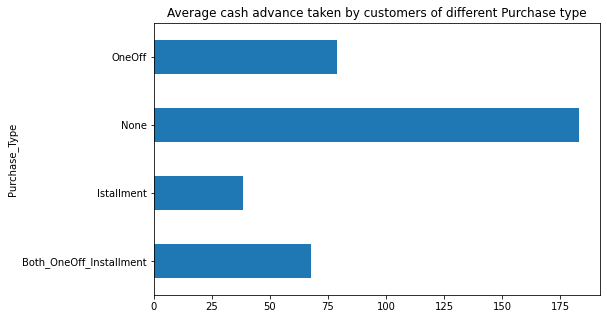

In [37]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Average cash advance taken by customers of different Purchase type')
df.groupby('Purchase_Type').apply(lambda x: np.mean(x['Monthly_Cash_Advance'])).plot.barh()
plt.show()

In [38]:
limit_avg_pay=df.groupby('Purchase_Type').apply(lambda x: np.mean(x['Limit_Usage']))

In [39]:
limit_avg_pay

Purchase_Type
Both_OneOff_Installment    0.353548
Istallment                 0.271678
None                       0.574049
OneOff                     0.381074
dtype: float64

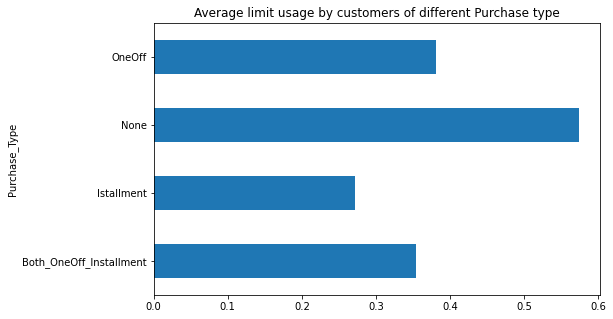

In [40]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Average limit usage by customers of different Purchase type')
df.groupby('Purchase_Type').apply(lambda x: np.mean(x['Limit_Usage'])).plot.barh()
plt.show()

In [41]:
dataset = copy.deepcopy(df[['Purchase_Type']])

In [42]:
dataset=pd.concat([dataset,pd.get_dummies(dataset['Purchase_Type'])],axis=1)

In [43]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage,Payment_Minpay,Purchase_Type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000,0.040901,1.446508,Istallment
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124,0.457495,3.826241,None
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000,0.332687,0.991682,OneOff
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,312.343947,0.000000,12.0,124.916667,17.149001,0.222223,0.000000,OneOff
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000,0.681429,2.771075,OneOff


In [44]:
def correlation(df):
    sn.set(style="white")
    dataset = copy.deepcopy(df)
    corr = dataset.drop(columns = ['CUST_ID','Purchase_Type']).corr()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(18, 15))
    cmap = sn.diverging_palette(220, 10, as_cmap=False)
    sn.heatmap(np.round(corr,2), mask=mask, cmap=cmap, vmax=1, center=0,annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .6})

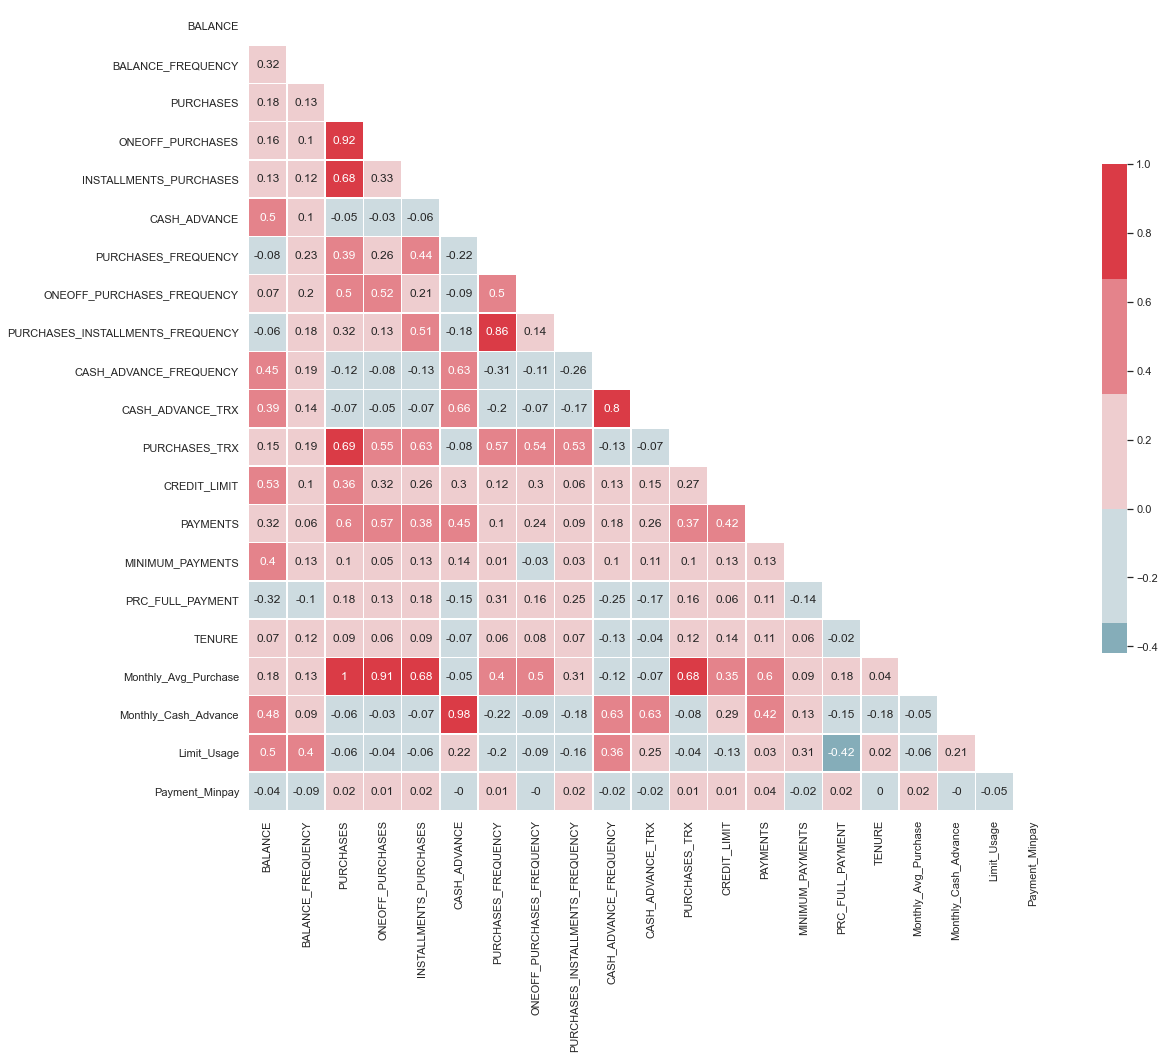

In [45]:
%matplotlib notebook
%matplotlib inline
correlation(df)

# ==================== Machine Learning =========================

# Factor Analysis

In [46]:
df_orgianl=pd.concat([df,pd.get_dummies(df['Purchase_Type'])],axis=1)

In [47]:
df_orgianl.drop('Purchase_Type',axis=1,inplace=True)

In [48]:
df_f = copy.deepcopy(df_orgianl)

In [49]:
df_f.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage,Payment_Minpay,Both_OneOff_Installment,Istallment,None,OneOff
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0.000000,12.0,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0.222222,12.0,0.000000,536.912124,0.457495,3.826241,0,0,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,12.0,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,0.000000,12.0,124.916667,17.149001,0.222223,0.000000,0,0,0,1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0.000000,12.0,1.333333,0.000000,0.681429,2.771075,0,0,0,1


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_f.iloc[0:,1:22]=scaler.fit_transform(df_f.iloc[0:,1:22].values)

In [51]:
df_f.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage,Payment_Minpay,Both_OneOff_Installment,Istallment,None,OneOff
0,C10001,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,...,-0.525588,0.360541,-0.433418,-0.460737,-0.893059,-0.064423,0,1,0,0
1,C10002,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,...,0.234159,0.360541,-0.477461,2.319245,0.175953,-0.044287,0,0,1,0
2,C10003,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,...,-0.525588,0.360541,-0.120516,-0.460737,-0.144316,-0.068272,0,0,0,1
3,C10004,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,...,-0.525588,0.360541,0.214573,-0.371944,-0.427774,-0.076663,0,0,0,1
4,C10005,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,...,-0.525588,0.360541,-0.470074,-0.460737,0.750582,-0.053215,0,0,0,1


In [52]:
df_f.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
Monthly_Avg_Purchase                0
Monthly_Cash_Advance                0
Limit_Usage                         0
Payment_Minpay                      0
Both_OneOff_Installment             0
Istallment                          0
None                                0
OneOff                              0
dtype: int64

In [53]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

In [54]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_f.iloc[0:,1:])
chi_square_value, p_value

(579034.455362799, 0.0)

### Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix
# Kaiser-Meyer-Olkin (KMO) Test

In [55]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_f.iloc[0:,1:])

In [56]:
round(kmo_model,5)

0.71361

### The overall KMO for our data is 0.71360, which is Good. This value indicates that I can proceed for factor analysis.

In [57]:
fa = FactorAnalyzer()
fa.fit(df_f.iloc[0:,1:],10)
eigen_values, vectors = fa.get_eigenvalues()

In [58]:
eigen_val_df=pd.DataFrame(np.round(eigen_values,4),columns=['Eigen_Values']).sort_values(by='Eigen_Values',ascending=False)

In [59]:
eigen_val_df

,Eigen_Values
0,6.0594
1,4.5983
2,2.1762
3,1.7981
4,1.4672
5,1.2632
6,1.0988
7,0.9923
8,0.8870
9,0.7693


## Here,We can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors

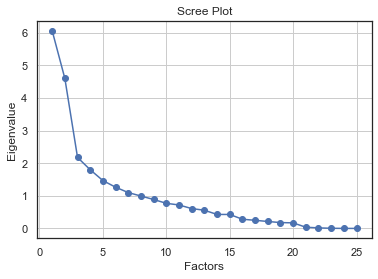

In [60]:
# Create scree plot using matplotlib
plt.scatter(range(1,df_f.iloc[0:,1:].shape[1]+1),eigen_values)
plt.plot(range(1,df_f.iloc[0:,1:].shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [61]:
fact_df = copy.deepcopy(df_f.iloc[0:,1:])

In [62]:
fact_df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
Monthly_Avg_Purchase                float64
Monthly_Cash_Advance                float64
Limit_Usage                         float64
Payment_Minpay                      float64
Both_OneOff_Installment               uint8
Istallment                      

## Factor Analysis

In [63]:
transformer = FactorAnalysis(n_components=6, random_state=0,rotation ='varimax')

In [64]:
transformer.fit(fact_df)

FactorAnalysis(n_components=6, rotation='varimax')

In [65]:
component_df=pd.DataFrame(transformer.components_)

In [66]:
indx =[i for i in range(len(fact_df.columns))]

In [67]:
name = [col for col in fact_df.columns]

In [68]:
for indx, col in zip(indx,name):
    component_df.rename(columns={indx:col},inplace=True)

In [69]:
%matplotlib inline
#from pandas.table.plotting import table

component_df.T


,0,1,2,3,4,5
BALANCE,0.193445,0.471103,-0.032093,-0.022468,-0.017539,0.570522
BALANCE_FREQUENCY,0.084678,0.093604,0.220273,-0.176391,-0.011531,0.519092
PURCHASES,0.984368,-0.026427,0.159049,-0.063550,-0.011778,0.011837
ONEOFF_PURCHASES,0.921996,-0.017488,-0.015184,-0.183987,0.064537,-0.010945
INSTALLMENTS_PURCHASES,0.633485,-0.030452,0.403850,0.187877,-0.146146,0.047978
CASH_ADVANCE,-0.012651,0.991158,-0.077085,0.018854,0.006671,0.051671
PURCHASES_FREQUENCY,0.232486,-0.136314,0.902636,-0.297182,0.103523,-0.057953
ONEOFF_PURCHASES_FREQUENCY,0.425049,-0.053152,0.177581,-0.789064,-0.012508,-0.001351
PURCHASES_INSTALLMENTS_FREQUENCY,0.172461,-0.103464,0.941792,0.116798,-0.084969,-0.027982
CASH_ADVANCE_FREQUENCY,-0.077395,0.604707,-0.196942,0.018525,-0.061447,0.336956


In [70]:
component_df.shape

(6, 25)

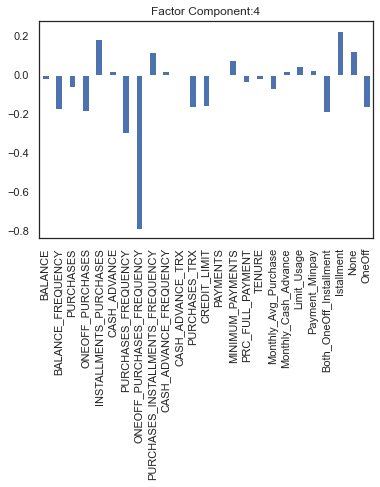

In [71]:
component_df.loc[3].plot(kind="bar")
plt.title('Factor Component:4')
plt.show()

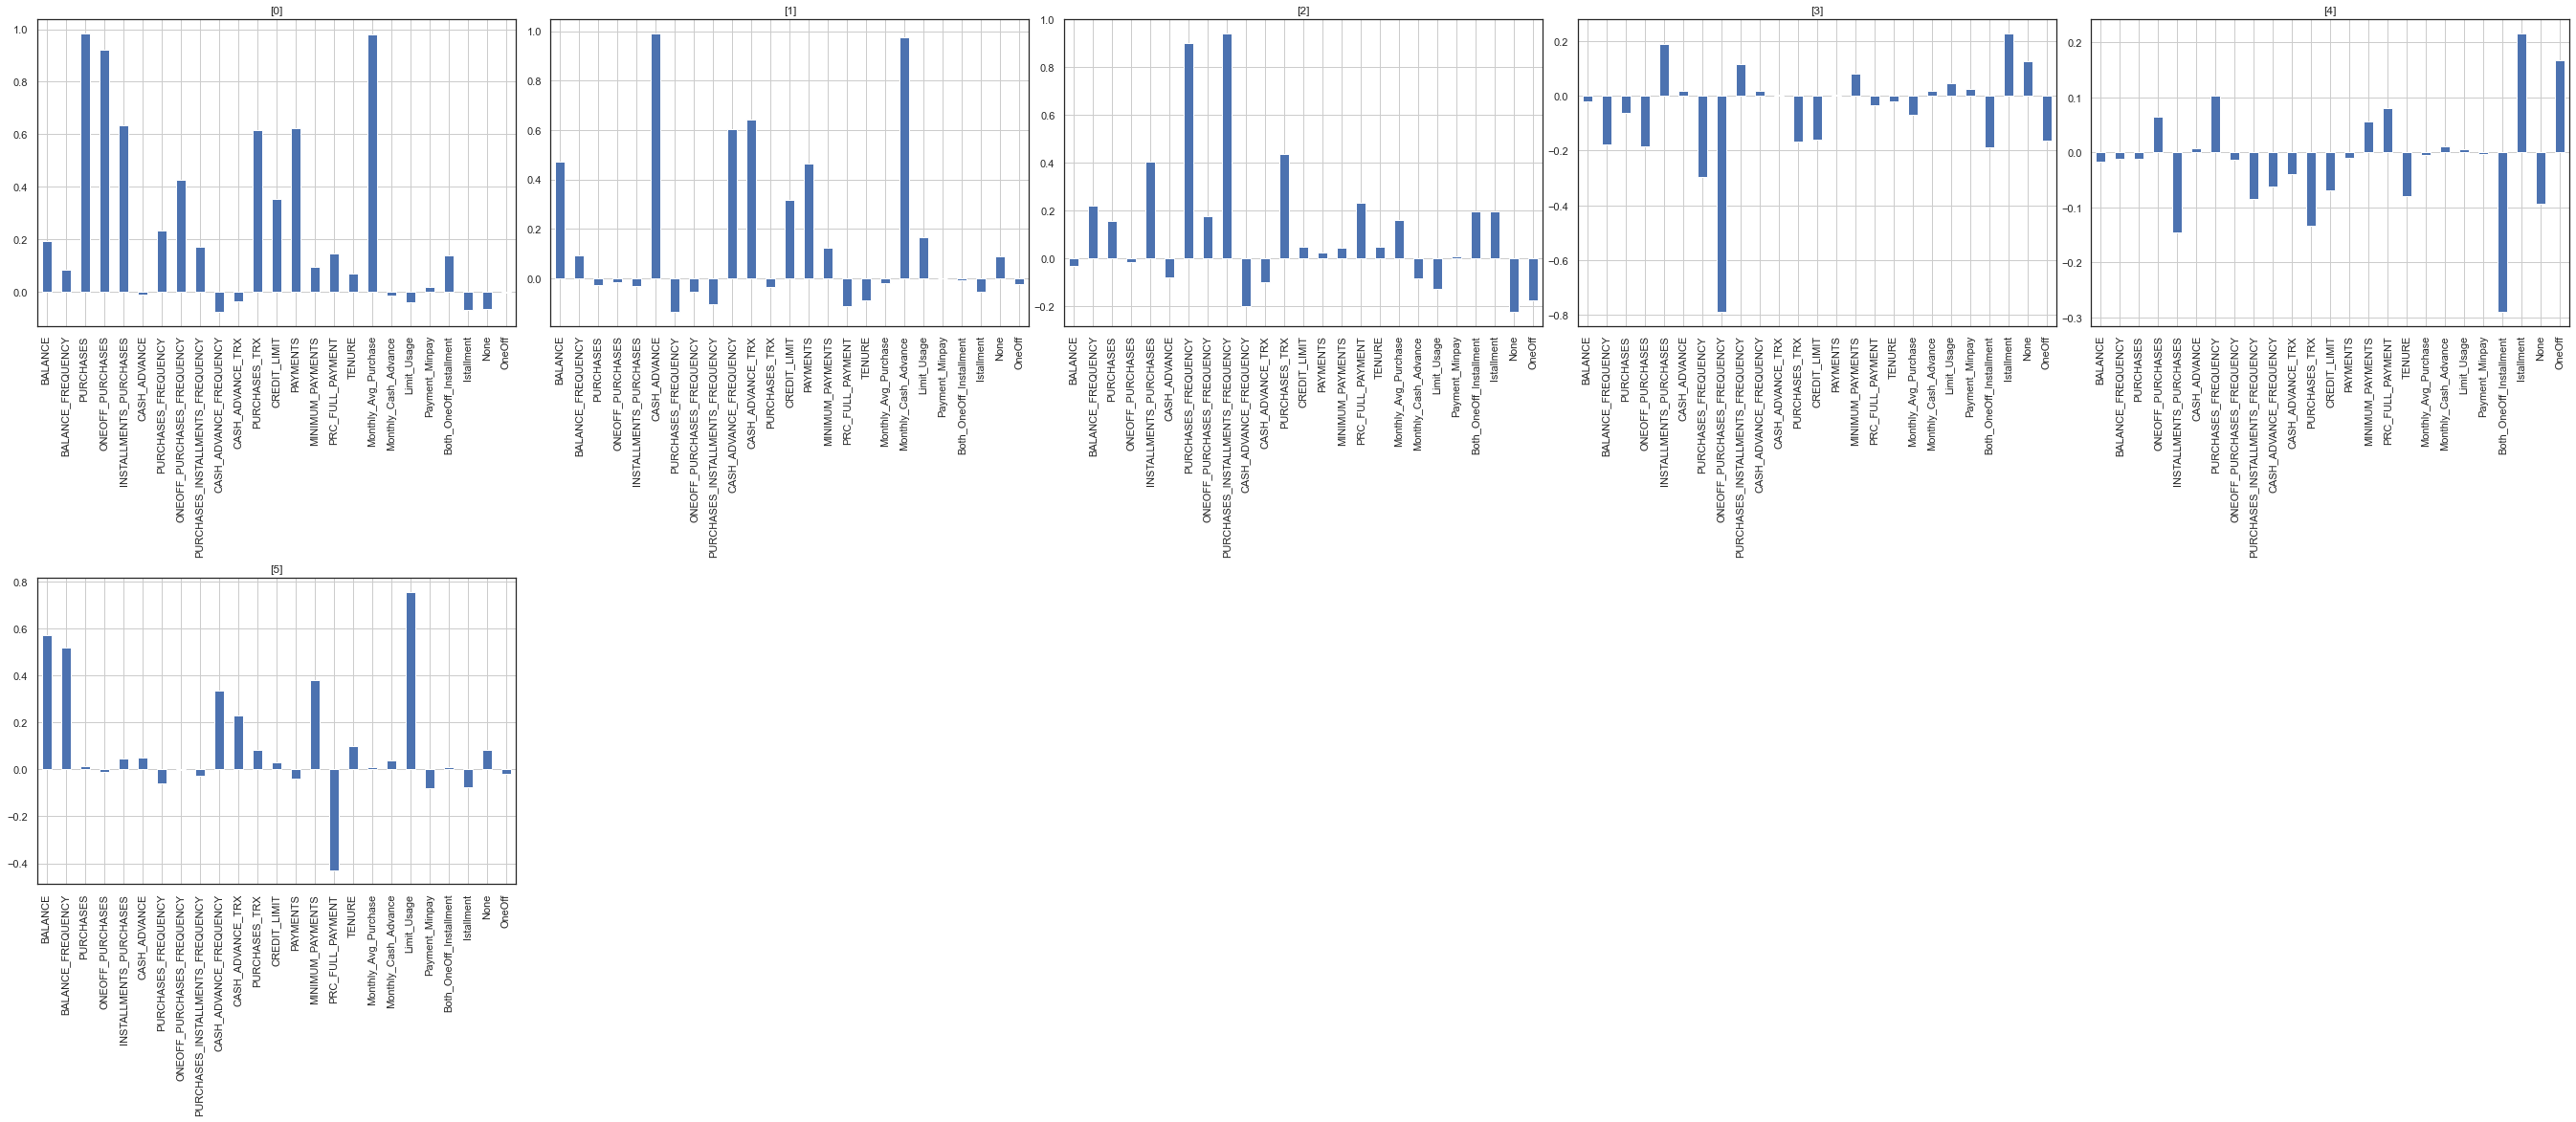

In [72]:
%matplotlib inline

fig = plt.figure(figsize=(25,23))
for i in range(1, component_df.shape[0] + 1):
    plt.subplot(3,5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title([i - 1])
    component_df.loc[i-1].plot(kind="bar")
    plt.grid(True)
plt.tight_layout(h_pad=0.8, w_pad=0.5 ,rect=[0, 0.03, 1.5, 0.95])
plt.show()

In [73]:
component_df.loc[2].sort_values(ascending=False)

PURCHASES_INSTALLMENTS_FREQUENCY    0.941792
PURCHASES_FREQUENCY                 0.902636
PURCHASES_TRX                       0.436795
INSTALLMENTS_PURCHASES              0.403850
PRC_FULL_PAYMENT                    0.234454
BALANCE_FREQUENCY                   0.220273
Both_OneOff_Installment             0.199151
Istallment                          0.197668
ONEOFF_PURCHASES_FREQUENCY          0.177581
Monthly_Avg_Purchase                0.160417
PURCHASES                           0.159049
CREDIT_LIMIT                        0.049705
TENURE                              0.048177
MINIMUM_PAYMENTS                    0.045099
PAYMENTS                            0.024035
Payment_Minpay                      0.010332
ONEOFF_PURCHASES                   -0.015184
BALANCE                            -0.032093
CASH_ADVANCE                       -0.077085
Monthly_Cash_Advance               -0.080354
CASH_ADVANCE_TRX                   -0.099234
Limit_Usage                        -0.126258
OneOff    

# Factor Result Analysis
* Factor 1 has high factor loadings for PURCHASES, Monthly_Avg_Purchase,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES ,PAYMENTS, PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY

* Factor 2 has high factor loadings for CASH_ADVANCE, Monthly_Cash_Advance,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY  

* Factor 3 has high factor loadings for PURCHASES_INSTALLMENTS_FREQUENCY, PURCHASES_FREQUENCY,PURCHASES_TRX, INSTALLMENTS_PURCHASES,

* Factor 4 has high factor loadings for ONEOFF_PURCHASES_FREQUENCY, PURCHASES_FREQUENCY

* Factor 5 has low factor loadings for Istallment,Both_OneOff_Installment so we can skip this

* Factor 6 has high factor loadings for Limit_Usage, BALANCE, BALANCE_FREQUENCY, PRC_FULL_PAYMENT

## Selected feature from 2nd factor based on the variance

* PURCHASES_INSTALLMENTS_FREQUENCY    
* PURCHASES_FREQUENCY                 
* PURCHASES_TRX                      
* INSTALLMENTS_PURCHASES              
* PRC_FULL_PAYMENT                  
* BALANCE_FREQUENCY                 
* Both_OneOff_Installment             
* CASH_ADVANCE_FREQUENCY             
* None 
* Limit_Usage                 
* OneOff

In [74]:
name_list = ['PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_FREQUENCY','PURCHASES_TRX','INSTALLMENTS_PURCHASES','PRC_FULL_PAYMENT',
             'BALANCE_FREQUENCY','Both_OneOff_Installment','CASH_ADVANCE_FREQUENCY','None','Limit_Usage','OneOff']

In [75]:
cluster_df = df_orgianl[name_list]

In [76]:
cluster_df.head()

,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_TRX,INSTALLMENTS_PURCHASES,PRC_FULL_PAYMENT,BALANCE_FREQUENCY,Both_OneOff_Installment,CASH_ADVANCE_FREQUENCY,None,Limit_Usage,OneOff
0,0.083333,0.166667,2.0,95.4,0.000000,0.818182,0,0.000000,0,0.040901,0
1,0.000000,0.000000,0.0,0.0,0.222222,0.909091,0,0.250000,1,0.457495,0
2,0.000000,1.000000,12.0,0.0,0.000000,1.000000,0,0.000000,0,0.332687,1
3,0.000000,0.083333,1.0,0.0,0.000000,0.636364,0,0.083333,0,0.222223,1
4,0.000000,0.083333,1.0,0.0,0.000000,1.000000,0,0.000000,0,0.681429,1


In [77]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

In [78]:
k =range(2,10)

In [79]:
k

range(2, 10)

In [80]:
distortions = []
for k in range(1,6):
    Cluster_Model = KMeans(n_clusters=k)
    Cluster_Model.fit(cluster_df)
    distortions.append(Cluster_Model.inertia_)

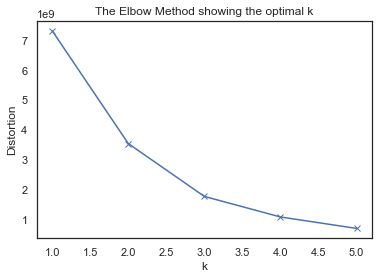

In [81]:
plt.plot(range(1,6), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [82]:
# so the optimal no of cluster is 3

In [83]:
k_mean = KMeans(init="random", n_clusters=3)
k_mean.fit(cluster_df)

KMeans(init='random', n_clusters=3)

In [84]:
labels=k_mean.labels_

In [85]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [86]:
labels_x=list() 
for i in range(10):
    labels_x.append(labels[labels.values==i])

In [87]:
labels.value_counts()

2    7809
0    1080
1      60
dtype: int64

In [88]:
cluster_df.shape

(8949, 11)

In [89]:
sum(labels.value_counts())

8949

In [90]:
c1=cluster_df.iloc[labels_x[0].index,:]

In [91]:
c1.describe().T

,count,mean,std,min,25%,50%,75%,max
PURCHASES_INSTALLMENTS_FREQUENCY,1080.0,0.865667,0.193501,0.083333,0.750000,1.000000,1.000000,1.00000
PURCHASES_FREQUENCY,1080.0,0.923343,0.148011,0.166667,0.916667,1.000000,1.000000,1.00000
PURCHASES_TRX,1080.0,45.462963,39.115694,2.000000,19.000000,35.000000,60.000000,344.00000
INSTALLMENTS_PURCHASES,1080.0,1736.997352,761.408448,958.580000,1169.750000,1500.540000,2036.550000,4660.10000
PRC_FULL_PAYMENT,1080.0,0.273999,0.366150,0.000000,0.000000,0.083333,0.545455,1.00000
BALANCE_FREQUENCY,1080.0,0.959891,0.121638,0.000000,1.000000,1.000000,1.000000,1.00000
Both_OneOff_Installment,1080.0,0.716667,0.450826,0.000000,0.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,1080.0,0.082274,0.167355,0.000000,0.000000,0.000000,0.083333,1.00000
None,1080.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Limit_Usage,1080.0,0.332933,0.328232,0.000000,0.057720,0.219373,0.520614,2.03358


In [92]:
c1_d=cluster_df.iloc[labels_x[0].index,:].describe().T

In [93]:
c2_d= cluster_df.iloc[labels_x[1].index,:].describe().T

In [94]:
c3_d= cluster_df.iloc[labels_x[2].index,:].describe().T

In [95]:
c2_d

,count,mean,std,min,25%,50%,75%,max
PURCHASES_INSTALLMENTS_FREQUENCY,60.0,0.917500,0.174921,0.166667,0.916667,1.000000,1.000000,1.000000
PURCHASES_FREQUENCY,60.0,0.941389,0.134965,0.333333,0.979167,1.000000,1.000000,1.000000
PURCHASES_TRX,60.0,119.066667,80.262254,5.000000,64.750000,99.500000,148.750000,358.000000
INSTALLMENTS_PURCHASES,60.0,7722.673500,3396.309687,4732.290000,5453.680000,6483.095000,8396.145000,22500.000000
PRC_FULL_PAYMENT,60.0,0.346423,0.415832,0.000000,0.000000,0.083333,0.833333,1.000000
BALANCE_FREQUENCY,60.0,0.980152,0.055952,0.727273,1.000000,1.000000,1.000000,1.000000
Both_OneOff_Installment,60.0,0.833333,0.375823,0.000000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,60.0,0.062500,0.194453,0.000000,0.000000,0.000000,0.000000,1.000000
None,60.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Limit_Usage,60.0,0.414660,0.342277,0.047418,0.127960,0.265757,0.608507,1.321426


In [96]:
cluster_df['Cluster3'] = labels

In [97]:
cluster_df = pd.concat([df['CUST_ID'],cluster_df],axis=1)

In [100]:
cluster_df.head()

,CUST_ID,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_FREQUENCY,PURCHASES_TRX,INSTALLMENTS_PURCHASES,PRC_FULL_PAYMENT,BALANCE_FREQUENCY,Both_OneOff_Installment,CASH_ADVANCE_FREQUENCY,None,Limit_Usage,OneOff,Cluster3
0,C10001,0.083333,0.166667,2.0,95.4,0.000000,0.818182,0,0.000000,0,0.040901,0,2.0
1,C10002,0.000000,0.000000,0.0,0.0,0.222222,0.909091,0,0.250000,1,0.457495,0,2.0
2,C10003,0.000000,1.000000,12.0,0.0,0.000000,1.000000,0,0.000000,0,0.332687,1,2.0
3,C10004,0.000000,0.083333,1.0,0.0,0.000000,0.636364,0,0.083333,0,0.222223,1,2.0
4,C10005,0.000000,0.083333,1.0,0.0,0.000000,1.000000,0,0.000000,0,0.681429,1,2.0


In [122]:
df['Cluster3'] = labels

In [123]:
cluster1 =df.iloc[labels_x[0].index,:]

In [124]:
cluster1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Limit_Usage,Payment_Minpay,Purchase_Type,Cluster3
5,C10006,1809.828751,1.0,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,1400.057770,2407.246035,0.000000,12.0,111.106667,0.000000,1.005460,0.581601,Istallment,0.0
13,C10014,921.693369,1.0,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.750000,...,1655.891435,251.137986,0.083333,12.0,178.160833,0.000000,0.122892,6.593552,Both_OneOff_Installment,0.0
15,C10016,6886.213231,1.0,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,...,1993.439277,2109.906490,0.000000,12.0,134.308333,191.790939,0.860777,0.944800,Istallment,0.0
30,C10031,12136.219960,1.0,3038.01,1013.20,2024.81,3183.583301,1.000000,0.166667,1.000000,...,4230.323491,3292.015030,0.000000,12.0,253.167500,265.298608,0.933555,1.285026,Both_OneOff_Installment,0.0
44,C10046,5315.945594,1.0,1525.44,469.80,1055.64,0.000000,1.000000,0.333333,1.000000,...,1430.341501,1318.714920,0.000000,12.0,127.120000,0.000000,0.625405,1.084648,Both_OneOff_Installment,0.0


# Cluster 1 Analysis 

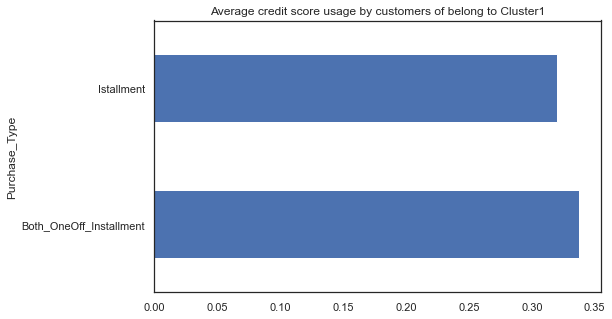

In [150]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Average credit score usage by customers of belong to Cluster1')
cluster1.groupby('Purchase_Type').apply(lambda x: np.mean(x['Limit_Usage'])).plot.barh()
plt.show()

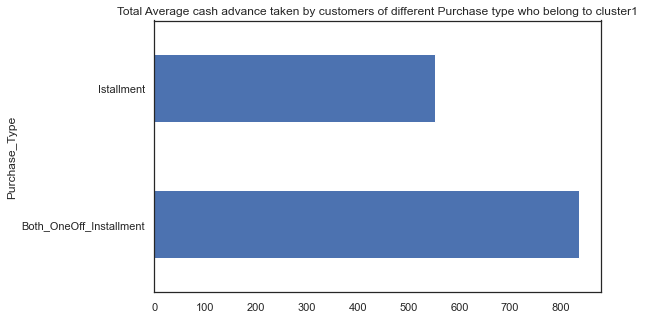

In [137]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Total Average cash advance taken by customers of different Purchase type who belong to cluster1')
cluster1.groupby('Purchase_Type').apply(lambda x: np.mean(x['CASH_ADVANCE'])).plot.barh()
plt.show()

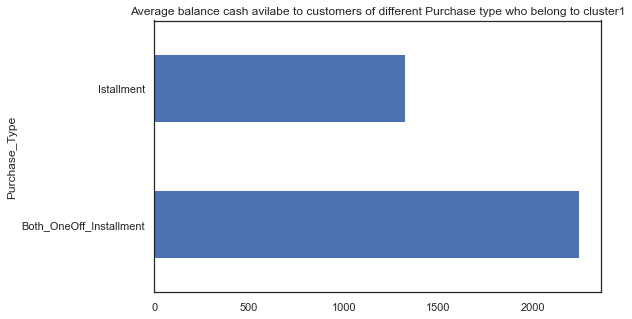

In [130]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Average balance cash avilabe to customers of different Purchase type who belong to cluster1')
cluster1.groupby('Purchase_Type').apply(lambda x: np.mean(x['BALANCE'])).plot.barh()
plt.show()

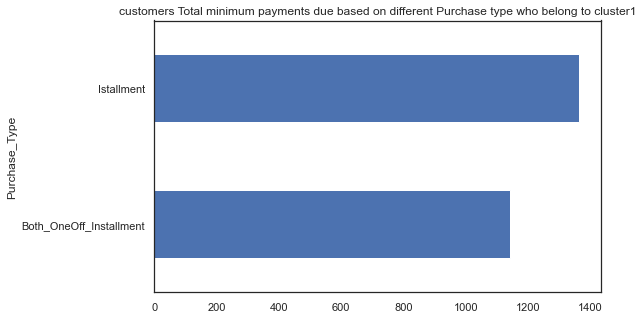

In [156]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('customers Total minimum payments due based on different Purchase type who belong to cluster1')
cluster1.groupby('Purchase_Type').apply(lambda x: np.mean(x['MINIMUM_PAYMENTS'])).plot.barh()
plt.show()

# Cluster 2 Analysis 

In [148]:
cluster2 =df.iloc[labels_x[1].index,:]

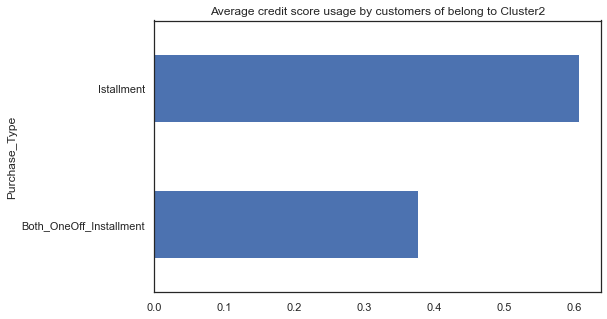

In [149]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Average credit score usage by customers of belong to Cluster2')
cluster2.groupby('Purchase_Type').apply(lambda x: np.mean(x['Limit_Usage'])).plot.barh()
plt.show()

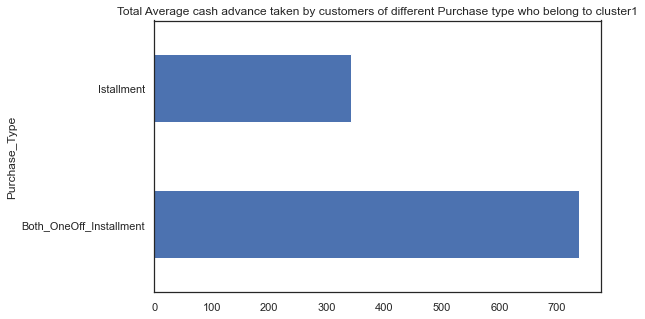

In [138]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Total Average cash advance taken by customers of different Purchase type who belong to cluster2')
cluster2.groupby('Purchase_Type').apply(lambda x: np.mean(x['CASH_ADVANCE'])).plot.barh()
plt.show()

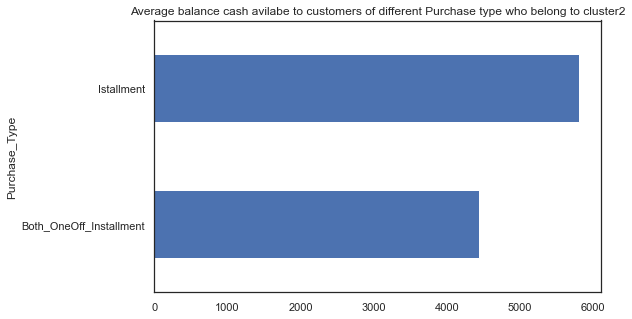

In [139]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Average balance cash avilabe to customers of different Purchase type who belong to cluster2')
cluster2.groupby('Purchase_Type').apply(lambda x: np.mean(x['BALANCE'])).plot.barh()
plt.show()

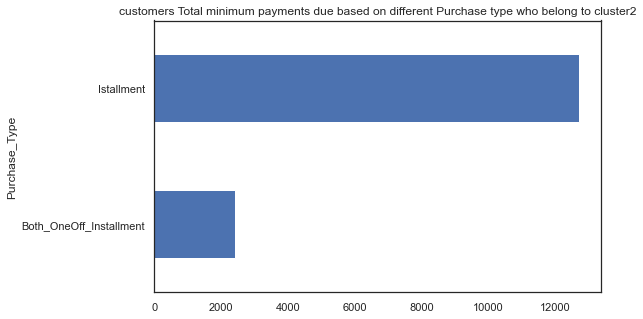

In [155]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('customers Total minimum payments due based on different Purchase type who belong to cluster2')
cluster2.groupby('Purchase_Type').apply(lambda x: np.mean(x['MINIMUM_PAYMENTS'])).plot.barh()
plt.show()

# Cluster3

In [143]:
cluster3 =df.iloc[labels_x[2].index,:]

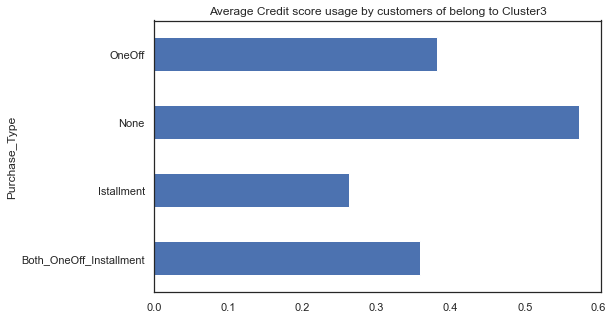

In [146]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Average Credit score usage by customers of belong to Cluster3')
cluster3.groupby('Purchase_Type').apply(lambda x: np.mean(x['Limit_Usage'])).plot.barh()
plt.show()

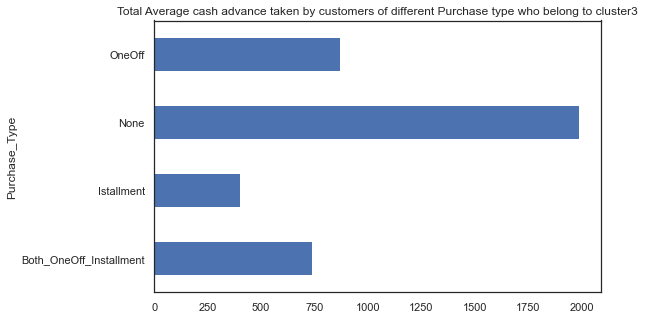

In [152]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('Total Average cash advance taken by customers of different Purchase type who belong to cluster3')
cluster3.groupby('Purchase_Type').apply(lambda x: np.mean(x['CASH_ADVANCE'])).plot.barh()
plt.show()

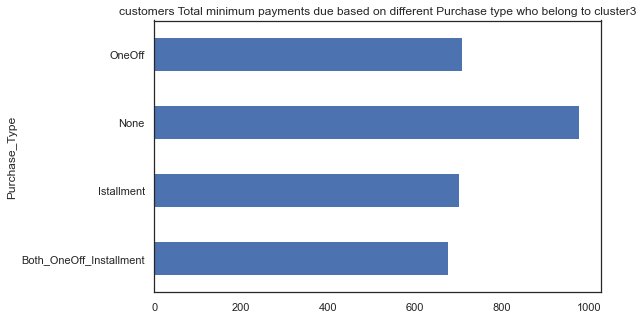

In [154]:
%matplotlib inline
plt.figure(figsize=(8,5))
plt.title('customers Total minimum payments due based on different Purchase type who belong to cluster3')
cluster3.groupby('Purchase_Type').apply(lambda x: np.mean(x['MINIMUM_PAYMENTS'])).plot.barh()
plt.show()

In [99]:
writer = pd.ExcelWriter('Assignment for Associate DS Role.xlsx', engine='xlsxwriter')
data_df.to_excel(writer, sheet_name='Originals Dataset',index=False)
df.to_excel(writer, sheet_name='Dataset for Ml Model',index=False)
component_df.to_excel(writer, sheet_name='Factor Analysis',index=False)
c1_d.to_excel(writer, sheet_name='Cluster1 discription',index=True)
c2_d.to_excel(writer, sheet_name='Cluster2 discription',index=True)
c3_d.to_excel(writer, sheet_name='Cluster3 discription',index=True)
cluster_df.to_excel(writer, sheet_name='Cluster dataframe',index=False)
writer.save()